In [18]:
import pandas as pd
import os
import glob

### Merging 12 months of sales data into a single csv file

In [19]:
df=pd.read_csv("Sales_April_2019.csv")

files= [file for file in os.listdir()]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [22]:
#Single liner for concatenation of 12 months csv files into single dataframe.

all_month_data = pd.concat([pd.read_csv(f) for f in glob.glob('Sales_*.csv')], ignore_index = True)
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [25]:
all_month_data.to_csv("all_data.csv",index=False)

# Read in updated dataframe


In [ ]:
#storing in a single data frame
df=pd.read_csv("all_data.csv")
df.head()

#### What was the best month for sales?How much was earned that month?

### Clean up the data

In [60]:
# creating nan_df containing all rows with any nan value
nan_df=df[df.isna().any(axis=1)]
nan_df.head()

#Cleaning df off nan values

df=df.dropna(how='any')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [46]:
#Creating month column

df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')

In [47]:
#Clearing rows with invalid month columns

df = df[df['Month'] != 'Or']

In [48]:
#changing data types to integer

df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [50]:
#computing monthly sales 

Monthly_sales=df.groupby('Month').sum()

In [51]:
Monthly_sales['Sales'].max()

4613443.340001534

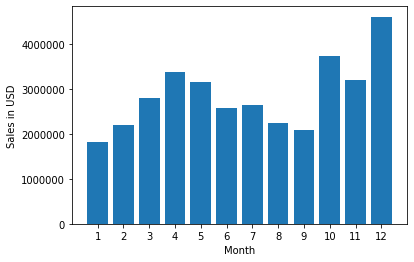

In [55]:
#Plotting Monthly sales for better visualisation

import matplotlib.pyplot as plt
months=range(1,13)

plt.bar(months,Monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

In [59]:
Monthly_sales.loc[Monthly_sales['Sales']==Monthly_sales['Sales'].max()]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06


#### What city had the highest number of Sales?

In [73]:
#creating city column

df['City']=df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[-1].split(' ')[-2]})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [74]:
#Computing total sales based on city

Sales_by_city=df.groupby('City').sum()
Sales_by_city[Sales_by_city['Sales']==Sales_by_city['Sales'].max()]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


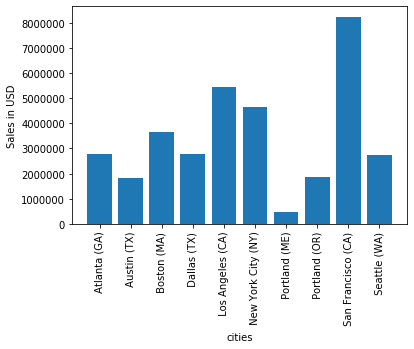

In [85]:
#Plotting sales by city

cities = [city for city,df1 in df.groupby('City')]

plt.bar(cities,Sales_by_city['Sales'])
plt.xticks(cities,rotation=90)
plt.xlabel('cities')
plt.ylabel('Sales in USD')
plt.show()

##### What time should we display advertisements to maximize likelihood of customer's buying product?


In [87]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [91]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute

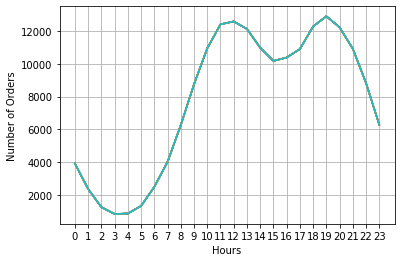

In [98]:
#Plotting no, of orders at differents hours in a day 

#hours=[hour for hour,df1 in df.groupby('Hour')]
hours=range(24)
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### What products are most often sold together??

In [104]:
#querying all products which are ordered together

df1 = df[df['Order ID'].duplicated(keep=False)]

df1['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df1=df1[['Order ID','Grouped']].drop_duplicates()
df1.head()

C:\Users\VINAYOO3\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [123]:
import itertools 
from collections import Counter

count=Counter()

for row in df1['Grouped']:
    row_list=row.split(',')
    count.update(Counter(itertools.combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)


















('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most ? Why do you think it sold the most?

In [124]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


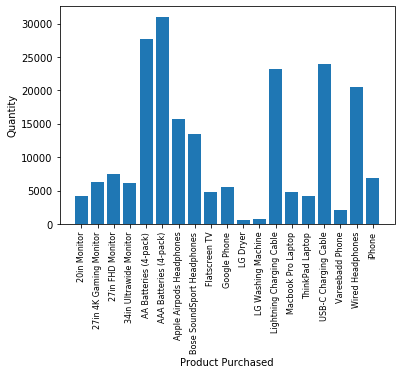

In [130]:
product_group=df.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df1 in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products,rotation=90,size=8)
plt.xlabel("Product Purchased")
plt.ylabel("Quantity")
plt.show()

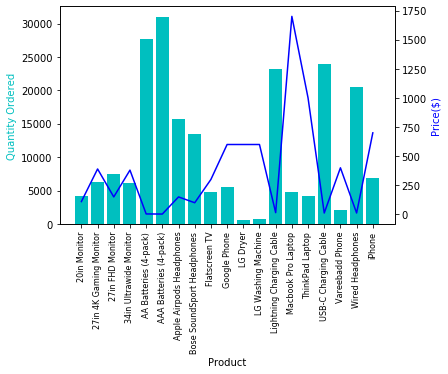

In [138]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='c')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered',color='c')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products,rotation=90,size=8)

plt.show()